<a href="https://colab.research.google.com/github/ByoungChan-Park/PJ2_Group-of-BigData-Job-Turnover-Trend/blob/main/New_Data_Scientist_Turnover_Trend_datawig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Description

- 1.1 해당 데이터 선정 이유
- 1.2 문제제기 방향
- 1.3 분석 목표

---


> ## 1.1 해당 데이터 선정 이유
- 본인이 데이터 분석가로 거듭나기 위한 선상에 놓여있기에, \
  데이터직종의 이직트렌드를 시사하기 적합하단 판단으로 데이터 선정 \
  
> - 대한민국에서의 데이터직군의 역사는 길지 않아 데이터 또한 많지 않았기에, \
데이터 산업의 근간이었던 미국의 데이터를 선정

  







> ## 1.2 문제제기 방향
- 이직성향이 어떤 특성으로 인해 좌우되는지 순위별로 확인

> - IT 직군에서의 이직은 도메인지식을 얻기 전까지는 빈번한 편에 속한다고 하는데, 단순 카더라가 아닌,\
  데이터적으로도 근속연차에 따라 이직률의 차이가 있는지 분석한다.

> - IT산업의 경우 신 산업분야중 하나이기에 대한민국의 판교처럼 업무환경이 인프라가 좋은곳인 경우가 많은데, 이는 보다 좋은인프라를 가진 도시로의 이직 희망율과 연관지을 수 있을 것 같다. 따라서 도시의 개발지수에 따라 이직희망율이 어떤지 분석한다.




> ## 1.3 분석 목표
- 데이터 직군 종사자들의 이직성향을 파악하여 예비 데이터직군 종사자들에게 시사한다.





> #### *1) 라이브러리 설치*

In [ ]:
#@title
# import sys
# if 'google.colab' in sys.modules:
#   !pip3 install datawig

> #### *2) 모듈 불러오기*

In [1]:
#@title

# To DataFrame
import pandas as pd
import numpy as np
import datawig

In [ ]:
#@title
# # To Visualization
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import seaborn as sns
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()
# plt.rc('font', family='NanumBarunGothic') 
# from pandas_profiling import ProfileReport
# from pdpbox import pdp
# import eli5
# from eli5.sklearn import PermutationImportance

# # To Preprocessing
# from imblearn.over_sampling import SMOTE
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# import datawig

# # To Encoding
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.preprocessing import OneHotEncoder
# # from category_encoders import OrdinalEncoder

# # To Mechine Learning
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import preprocessing
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.pipeline import make_pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import f1_score
# from sklearn.metrics import classification_report

# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# 2. Data Exploration

- 2.1 Import Data from GoogleDrive
- 2.2 Introduce Column
- 2.3 Data Profiling(사전확인)

> ## 2.1 Import Data from GoogleDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_mice = pd.read_csv('/content/drive/MyDrive/bootcamp_project/HR Analytics/train_mice.csv')

>> ### **3.1_4 Categorical Variable Missing Value Processing**
- datawig 라이브러리를 활용해 결측값 대치
- *(major_discipline,　gender,　company_type)*

---

In [4]:
train_mice

,enrollee_id,gender,enrolled_university,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,city_development_index,company_type,company_size,target
0,7041,Male,0.0,2.0,Humanities,65,1,0.0,4.0,city_40,0.776,Pvt Ltd,5.0,0
1,29117,NaN,2.0,2.0,STEM,12,0,0.0,5.0,city_11,0.550,NaN,3.0,0
2,30937,Female,1.0,2.0,STEM,83,0,0.0,3.0,city_57,0.866,Pvt Ltd,1.0,0
3,25290,NaN,0.0,1.0,NaN,29,1,0.0,4.0,city_173,0.878,Pvt Ltd,3.0,0
4,10481,NaN,2.0,2.0,Business Degree,214,0,0.0,5.0,city_102,0.804,NaN,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,29245,Male,0.0,2.0,Humanities,91,0,10.0,4.0,city_102,0.804,NaN,3.0,1
19154,12786,NaN,2.0,2.0,STEM,26,1,10.0,3.0,city_136,0.897,NGO,1.0,1
19155,9158,NaN,0.0,3.0,STEM,13,1,10.0,4.0,city_21,0.624,NaN,6.0,1
19156,32626,Other,0.0,2.0,NaN,51,1,10.0,4.0,city_150,0.698,NaN,1.0,1


In [16]:
train_mice.isna().sum()

enrollee_id                  0
gender                    4508
enrolled_university          0
education_level              0
major_discipline          2813
training_hours               0
relevent_experience          0
experience                   0
last_new_job                 0
city                         0
city_development_index       0
company_type              6140
company_size                 0
target                       0
dtype: int64

In [24]:
drop_major_discipline = train_mice.columns.to_list().remove('major_discipline')

In [26]:
df_train, df_test = datawig.utils.random_split(train_mice)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns = ['gender', 'company_type'], # column(s) containing information about the column we want to impute
    output_column = 'major_discipline', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

2022-07-27 07:14:55,507 [INFO]  NumExpr defaulting to 2 threads.
2022-07-27 07:14:57,399 [INFO]  
========== start: fit model
2022-07-27 07:14:57,400 [WARNING]  Already bound, ignoring bind()
2022-07-27 07:15:04,326 [INFO]  Epoch[0] Batch [0-368]	Speed: 855.14 samples/sec	cross-entropy=0.556179	major_discipline-accuracy=0.884993
2022-07-27 07:15:11,145 [INFO]  Epoch[0] Train-cross-entropy=0.528024
2022-07-27 07:15:11,147 [INFO]  Epoch[0] Train-major_discipline-accuracy=0.884949
2022-07-27 07:15:11,155 [INFO]  Epoch[0] Time cost=13.743
2022-07-27 07:15:11,162 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2022-07-27 07:15:12,398 [INFO]  Epoch[0] Validation-cross-entropy=0.498077
2022-07-27 07:15:12,400 [INFO]  Epoch[0] Validation-major_discipline-accuracy=0.889482
2022-07-27 07:15:19,308 [INFO]  Epoch[1] Batch [0-368]	Speed: 855.82 samples/sec	cross-entropy=0.492801	major_discipline-accuracy=0.887534
2022-07-27 07:15:28,375 [INFO]  Epoch[1] Train-cross-entropy=0.495115
20

In [30]:
df_test.isna().sum()

enrollee_id                  0
gender                     912
enrolled_university          0
education_level              0
major_discipline           555
training_hours               0
relevent_experience          0
experience                   0
last_new_job                 0
city                         0
city_development_index       0
company_type              1230
company_size                 0
target                       0
dtype: int64

In [58]:
train_mice_num = train_mice[train_mice.columns.difference(['gender', 'company_type', 'city', 'enrollee_id', 'target'])]

In [61]:
a = train_mice_num[train_mice_num.columns.difference(['major_discipline'])].applymap(str)
# train_mice_str=train_mice.applymap(str)

In [67]:
result1 = pd.concat([a, train_mice['major_discipline']], axis=1)

In [69]:
result1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 9 columns):
city_development_index    19158 non-null object
company_size              19158 non-null object
education_level           19158 non-null object
enrolled_university       19158 non-null object
experience                19158 non-null object
last_new_job              19158 non-null object
relevent_experience       19158 non-null object
training_hours            19158 non-null object
major_discipline          16345 non-null object
dtypes: object(9)
memory usage: 1.3+ MB


In [80]:
result1.columns

Index(['city_development_index', 'company_size', 'education_level',
       'enrolled_university', 'experience', 'last_new_job',
       'relevent_experience', 'training_hours', 'major_discipline'],
      dtype='object')

In [87]:
drop_cat = result1.columns.to_list()
drop_cat.remove('major_discipline')

In [88]:
drop_cat

['city_development_index',
 'company_size',
 'education_level',
 'enrolled_university',
 'experience',
 'last_new_job',
 'relevent_experience',
 'training_hours']

In [89]:
df_train2, df_test2 = datawig.utils.random_split(result1)
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns = drop_cat, # column(s) containing information about the column we want to impute
    output_column = 'major_discipline', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train2, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test2)

INFO:root:
========== start: fit model
INFO:root:Epoch[0] Batch [0-368]	Speed: 563.16 samples/sec	cross-entropy=0.532931	major_discipline-accuracy=0.884993
INFO:root:Epoch[0] Train-cross-entropy=0.512501
INFO:root:Epoch[0] Train-major_discipline-accuracy=0.884949
INFO:root:Epoch[0] Time cost=20.801
INFO:root:Saved checkpoint to "imputer_model/model-0000.params"
INFO:root:Epoch[0] Validation-cross-entropy=0.491264
INFO:root:Epoch[0] Validation-major_discipline-accuracy=0.889482
INFO:root:Epoch[1] Batch [0-368]	Speed: 791.97 samples/sec	cross-entropy=0.471339	major_discipline-accuracy=0.887534
INFO:root:Epoch[1] Train-cross-entropy=0.474424
INFO:root:Epoch[1] Train-major_discipline-accuracy=0.886224
INFO:root:Epoch[1] Time cost=14.232
INFO:root:Saved checkpoint to "imputer_model/model-0001.params"
INFO:root:Epoch[1] Validation-cross-entropy=0.484541
INFO:root:Epoch[1] Validation-major_discipline-accuracy=0.889482
INFO:root:Epoch[2] Batch [0-368]	Speed: 863.39 samples/sec	cross-entropy=0.

In [90]:
df_test2.isna().sum()

city_development_index      0
company_size                0
education_level             0
enrolled_university         0
experience                  0
last_new_job                0
relevent_experience         0
training_hours              0
major_discipline          555
dtype: int64

In [91]:
print("어서오세요~")

어서오세요~


In [93]:
train_mice_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 9 columns):
city_development_index    19158 non-null float64
company_size              19158 non-null float64
education_level           19158 non-null float64
enrolled_university       19158 non-null float64
experience                19158 non-null float64
last_new_job              19158 non-null float64
major_discipline          16345 non-null object
relevent_experience       19158 non-null int64
training_hours            19158 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.3+ MB


In [96]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3831 entries, 447 to 7293
Data columns (total 9 columns):
city_development_index    3831 non-null object
company_size              3831 non-null object
education_level           3831 non-null object
enrolled_university       3831 non-null object
experience                3831 non-null object
last_new_job              3831 non-null object
relevent_experience       3831 non-null object
training_hours            3831 non-null object
major_discipline          3276 non-null object
dtypes: object(9)
memory usage: 299.3+ KB


In [94]:
df_train3, df_test3 = datawig.utils.random_split(train_mice_num)
#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns = drop_cat, # column(s) containing information about the column we want to impute
    output_column = 'major_discipline', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train3, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test3)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_test3.isna.sum()

In [ ]:
train = train_raw
train=train[['enrollee_id', 'gender', 'enrolled_university', 'education_level', 
            'major_discipline', 'training_hours', 'relevent_experience', 'experience', 
            'last_new_job', 'city', 'city_development_index', 'company_type', 'company_size', 'target']]
train.head(10)

,enrollee_id,gender,enrolled_university,education_level,major_discipline,training_hours,relevent_experience,experience,last_new_job,city,city_development_index,company_type,company_size,target
0,7041,Male,no_enrollment,Graduate,Humanities,65,Has relevent experience,<1,1,city_40,0.776,Pvt Ltd,1000-4999,0
1,29117,NaN,Full time course,Graduate,STEM,12,No relevent experience,<1,<1,city_11,0.550,NaN,NaN,0
2,30937,Female,Part time course,Graduate,STEM,83,No relevent experience,<1,2,city_57,0.866,Pvt Ltd,10/49,0
3,25290,NaN,no_enrollment,High School,NaN,29,Has relevent experience,<1,1,city_173,0.878,Pvt Ltd,100-500,0
4,10481,NaN,Full time course,Graduate,Business Degree,214,No relevent experience,<1,<1,city_102,0.804,NaN,NaN,0
5,24226,Female,no_enrollment,Graduate,STEM,13,Has relevent experience,<1,1,city_21,0.624,Pvt Ltd,50-99,0
6,17783,Male,Full time course,Graduate,STEM,11,Has relevent experience,<1,2,city_65,0.802,Pvt Ltd,10000+,0
7,17941,NaN,no_enrollment,Masters,Business Degree,18,No relevent experience,<1,1,city_21,0.624,Pvt Ltd,10000+,0
8,20653,Male,Full time course,Graduate,STEM,44,No relevent experience,<1,1,city_16,0.910,NaN,NaN,0
9,15297,NaN,Full time course,NaN,NaN,34,No relevent experience,<1,<1,city_103,0.920,NaN,NaN,0


2022-07-25 17:41:25,216 [WARNING]  findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


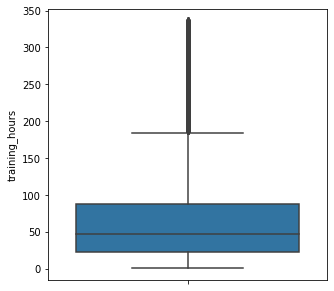

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(y = 'training_hours', data = train)

## 2.2 Introduce Column
> ### **Surveyor**
  * **enrollee_id - 설문자 고유번호**<br>
  * **gender - 설문자 성별**<br>
    *('Male',　'Female',　'Other',　nan)*
  * **target - 이직희망여부**<br>
    *('0'_False,　'1'_True)*<br><br>

> ### **Knowledge**
  * **enrolled_university	- 대학 진학 과정**<br>
      *('Full time course',　'Part time course',　'no_enrollment',　nan)*
  * **education_level - 학위**<br>
    *('Phd',　'Masters',　'Graduate',　'High School',　'Primary School',　nan )*
  * **major_discipline - 전공**<br>
    *('STEM',　'Business Degree',　'Humanities',　'Arts',　'Other',　'No Major',　nan)*
  * **training_hours - 교육시간**<br>
    *(1~336_Continuous Data)*
  * **relevent_experience - 데이터직군 관련경험**<br>
    *('Has relevent experience',　'No relevent experience')*
  * **experience - 경력년수**<br>
    *(0~21_Continuous Data / nan)*
  * **last_new_job - 공백기**<br>
    *(0~4_Continuous Data / nan)*<br><br>

> ### **City**
  * **city - 도시 고유 번호**<br>
  * **city_development_index - 도시 개발 지수**<br>
    *(0.448~0.949_Continuous Data)*<br><br>

> ### **Company**
  * **company_type - 회사 유형**<br>
    *('Pvt Ltd',　'Funded Startup',　'Early Stage Startup',　'Public Sector',　'NGO',　'Other',　nan)*
  * **company_size - 사내 직원수**<br>
    *(<10,　10-49,　50-99,　100-500,　500-999,　1000-4999,　5000-9999,　10000<,　nan)*

---
 


> ## 2.2 Data Profiling
> ### Profiling Insight
- '**city**' column 은  도시의 고유명이기에 **High cardinality** 현상을 보인다.
- '**enrollee_id**' column 은 설문자의 고유명이기에 **Unique** 하다.
- '**target**' column 은 0과 1로 이루어진 형태이기에 0값의 비중이 높아 **Zeros** 현상을 보인다.
- 이외의 column 들은 결측치가 존재하여 **Missing** 문제가 식별된다.

In [ ]:
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

2022-07-25 17:41:30,011 [INFO]  NumExpr defaulting to 2 threads.
2022-07-25 17:41:30,062 [INFO]  NumExpr defaulting to 2 threads.


TypeError: ignored

# 3. Exploratory Data Analysis_(EDA)

- 3.1 Data Preprocessing
- 3.2 Encoding
- 3.3 Data Balancing





> ## 3.1 Data Preprocessing
- 2.2 Data Profiling 에서 확인된 문제들을 시각화하여 확인하고, 전처리계획 수립


In [ ]:
# 특성별 정보 확인
train.info()

In [ ]:
# 특성별 결측치 확인
train.isna().sum()

In [ ]:
missing_value = 100 * train.isnull().sum()/len(train)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']
missing_value['missing values in percentage'] = missing_value['missing values in percentage'].round(2)

In [ ]:
#그래프배경
fig, ax = plt.subplots(1, 1, figsize=(13.8, 18.4))
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=0.38, wspace=0.2)
sns.set(style='whitegrid')

#그래프부문(barplot)
fig1 = sns.barplot(x='variables', y='missing values in percentage', 
                   data=missing_value.sort_values('missing values in percentage', ascending=False), palette='rainbow_r')
plt.ylim(0, 50.00)
plt.xlabel('Column', fontsize = 15, fontweight = 'bold')
plt.ylabel('Rate (%)', fontsize = 15, fontweight = 'bold')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='large'
                  )
plt.title('Percentage of missing values by column', size=16);


#그래프제목(네모칸)
fig.text(-0.08, 0.5,
         '''Percentage of missing values by column
         ''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

# 그래프 설명(네모칸 아래)
fig.text(-0.06, 0.39, 
         '''
         Insight :

         1) 결측값이 있는 수치형변수(현재는 범주형변수일수 있으나, 순위를 측정할 수 있는 변수)
            - enrolled_university,　education level,　experience,　last new job,　company size

         2) 결측값이 있는 범주형변수(순위를 측정할 수 없는 변수)
            - gender,　major_discipline,　company_type
         ''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

# 그래프 설명(그래프 아래)
fig.text(-0.06, -0.3, 
         '''
         Respond :

           - 결측값이 10%~20% 수준일때 삭제 혹은 최빈값으로 대치하는 것이 일반적이나, 
             시간과 돈의 집합체로 수집된 데이터를 최대한 활용하기 위해 다른방법을 강구.

           - 수치형변수에 대해선 다중대치법(Multivariate impuattion by chained equations_MICE)를 통해 누락된 데이터를 대체
             (MICE : 여러 결측치 대치세트를 만들어 통계모델링을 수행하고 도출된 평균,분산,신뢰구간을 통해 최적의 대체값을 찾는방법)

           - 범주형변수에 대해선 딥러닝에 속하는 datawig 라이브러리를 활용하여 모델학습 후 누락된 값을 유추한다.
             (한번에 한개의 column만 대체 가능하기 때문에, 결측값의 비중이 적은 column순으로 적용하여 결측값 비중이 가장 높은 company_type의 유추 정확도를 향상)
         ''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

>> ### **3.1_1 Numeric Variable Encoding**
  * 결측값 처리 이전 순위를 측정할 수 있는 변수들에 대하여 Mapping을 통한 Encoding

In [ ]:
train_map = train.copy()

In [ ]:
for feature in train_map.columns:
    print('*******','Column name:',feature,'*******')
    print(train_map[feature].unique())
    print('***********-end-***********')
    print(' ')

In [ ]:
train_map.head()

In [ ]:
# Column name: enrolled_university
# 미진학 : 0점 / 야간대학과정 : 1점 / 정규대학과정 : 2점

train_map['enrolled_university'] = train_map['enrolled_university'].map({'no_enrollment':int(0),
                                                                           'Part time course':int(1),
                                                                           'Full time course':int(2)
                                                                           })

In [ ]:
# Column name: education_level
# 초등학교졸업 : 0점 / 고등학교졸업 : 1점 / 학사 : 2점 / 석사 : 3점 / 박사 : 4점

train_map['education_level'] = train_map['education_level'].map({'Primary School':int(0),
                                                                   'High School':int(1),
                                                                   'Graduate':int(2),
                                                                   'Masters':int(3),
                                                                   'Phd':int(4)
                                                                   })

In [ ]:
# Column name: relevent_experience
# boolean으로 분류할 수 있으나, 데이터직군 경험은 구직시 메리트로 적용됨으로 경험 여부를 차등화
# 경험없음 : 0점 / 경험있음 : 1점 

train_map['relevent_experience'] = train_map['relevent_experience'].map({'No relevent experience':int(0), 'Has relevent experience':int(1)})

In [ ]:
# Column name: experience
# 경험년차가 높을수록 높은점수 부여

train_map['experience'] = train_map['experience'].map({'<1':int(0), '1':int(1), '2':int(2), '3':int(3),
                                                         '4':int(4), '5':int(5), '6':int(6),'7':int(7),
                                                         '8':int(8),'9':int(9), '10':int(10), '11':int(11),
                                                         '12':int(12), '13':int(13), '14':int(14), '15':int(15),
                                                         '16':int(16), '17':int(17), '18':int(18), '19':int(19),
                                                         '20':int(20), '>20':int(21)})

In [ ]:
# Column name: last_new_job
# 이전직장과의 년수 차이(공백기)가 낮을수록 높은점수 부여
train_map['last_new_job'] = train_map['last_new_job'].map({'>4':int(0), '4':int(1), '3':int(2), '2':int(3), '1':int(4), '<1':int(5)})

In [ ]:
# Column name: company_size
# 회사규모(사원수)가 클수록 높은점수 부여
train_map['company_size'] = train_map['company_size'].map({'<10':int(0), '10/49':int(1), '50-99':int(2), '100-500':int(3),
                                                             '500-999':int(4), '1000-4999':int(5), '5000-9999':int(6), '10000+':int(7)
                                                             })

>> ### **3.1_2 Categorical Variable Encoding**
  * datawig 라이브러리의 효율향상을 위해 결측값 처리 이전 자연어에 대해 Mapping을 통한 Encoding
  * 우열을 가릴 수 없는 범주형 변수이기에 mapping값은 수치적의미가 아닌 암호화의 개념을 적용
  * 수치형 변수들과 구별하기 위해 음수값으로 표현

In [ ]:
# # Column name: gender
# # 남성 : -1 / 여성 : -2 / 기타 : -3
# train_map['gender'] = train_map['gender'].map({'Male':int(-1), 'Female':int(-2), 'Other':int(-3)})

In [ ]:
# # Column name: major_discipline
# # 공학계열 : -1 / 경영학계열 : -2 / 인문학계열 : -3 / 예술계열 : -4 / 기타전공 : -5 / 비전공 : -6
# train_map['major_discipline'] = train_map['major_discipline'].map({'STEM':int(-1) ,'Business Degree':int(-2),
#                                                                      'Humanities':int(-3), 'Arts':int(-4),
#                                                                      'Other':int(-5) ,'No Major':int(-6)
#                                                                      })

In [ ]:
# # Column name: company_type
# # 주식회사 : -1 / 투자형 스타트업 : -2 / 초기 스타트업 : -3 / 공기업 : -4 / 사회적기업 : -5 / 기타 : -6

# train_map['company_type'] = train_map['company_type'].map({'Pvt Ltd':int(-1), 'Funded Startup':int(-2),
#                                                              'Early Stage Startup':int(-3), 'Public Sector':int(-4),
#                                                              'NGO':int(-5), 'Other':int(-6)
#                                                              })

>> ### **3.1_3 Numeric Variable Missing Value Processing**
- MICE를 통해 결측값 대치
- *(enrolled_university,　education level,　experience,　last new job,　company size)*

---

In [ ]:
# 3.1_2에서 Mapping을 위해 만든 dictionary를 활용

train_mice = train_map.copy()
mice_imputer = IterativeImputer()

train_mice['enrolled_university']= mice_imputer.fit_transform(train_map[['enrolled_university']])
train_mice['enrolled_university'] = round(train_mice['enrolled_university'])

train_mice['education_level'] = mice_imputer.fit_transform(train_map[['education_level']])
train_mice['education_level'] = round(train_mice['education_level'])

train_mice['experience']= mice_imputer.fit_transform(train_map[['experience']])
train_mice['experience'] = round(train_mice['experience'])

train_mice['last_new_job']= mice_imputer.fit_transform(train_map[['last_new_job']])
train_mice['last_new_job'] = round(train_mice['last_new_job'])

train_mice['company_size']= mice_imputer.fit_transform(train_map[['company_size']])
train_mice['company_size'] = round(train_mice['company_size'])

In [ ]:
train_mice.isna().sum()

>> ### **3.1_4 Categorical Variable Missing Value Processing**
- datawig 라이브러리를 활용해 결측값 대치
- *(major_discipline,　gender,　company_type)*

---

In [ ]:
# enrollee_id 중복값이 없음을 확인
train.enrollee_id.value_counts().max()
# id는 고유의 수임이 확인 되었으므로 index로 사용 / 아이디 순서대로 나열
train = train.sort_values('enrollee_id')
# enrollee_id를 index로 지정 완료
train = train.set_index('enrollee_id')
train.head()



>> ### 3.1_1 enrollee_id

---












gender,　enrolled_university,　major_discipline,　company_type              

In [ ]:
# 중복값이 없음을 확인
train.enrollee_id.value_counts().max()

In [ ]:
# id는 고유의 수임이 확인 되었으므로 index로 사용하면 편할것으로 예상 / 아이디 순서대로 나열
train = train.sort_values('enrollee_id')

In [ ]:
# enrollee_id를 index로 지정 완료
train = train.set_index('enrollee_id')
train.head()

>> ### 3.1_2 city, city_development_index Wrangling


---




In [ ]:
# city column은 city_code형태로 되어있으며, 이는 도시를 code화 시킨 고유값임을 알 수 있음. / 오탈자가 없어 따로 핸들링하지 않음
train.city.unique()

In [ ]:
# city_development_index의 최소, 최대값을 확인하고, 이에따라 0.1단위로 등급을 부여
print(train.city_development_index.max())
print(train.city_development_index.min())

train["city_development_index"] = round(train["city_development_index"]*10,0)

train.CDI = train.CDI.astype(int)
train.CDI.unique()

train.head()

In [ ]:
train.head()


>> ### 3.1_3 Gender

---

In [ ]:
train.gender.unique()

In [ ]:
train.gender = train.gender.fillna(value = 'No Data')
train.gender.unique()

>> ### 3.1_4 Relevent_Experience
---

In [ ]:
# 사실상 boolean으로, T,F로 분류
train.relevent_experience.unique()

In [ ]:
train.relevent_experience = train.relevent_experience.replace("No relevent experience", 'F')
train.relevent_experience = train.relevent_experience.replace("Has relevent experience", 'T')
train.relevent_experience.unique()

>> ### 3.1_5 Enrolled_University

---

In [ ]:
train.enrolled_university.unique()

In [ ]:
train.enrolled_university = train.enrolled_university.replace("no_enrollment", "Not applicable")
train.enrolled_university = train.enrolled_university.fillna(value = 'No Data')
train.enrolled_university.unique()

>> ### 3.1_6 Education_Level

---



In [ ]:
train.education_level.unique()

In [ ]:
train.education_level = train.education_level.fillna(value = 'No Data')
train.education_level.unique()

>> ### 3.1_7 Major_Discipline

---

In [ ]:
train.major_discipline.unique()

In [ ]:
train.major_discipline = train.major_discipline.fillna(value = 'No Data')
train.major_discipline.unique()

>> ### 3.1_8 Experience
---

In [ ]:
train.experience.unique()

In [ ]:
train.experience = train.experience.replace(">20", "21")
train.experience = train.experience.replace("<1", "0")
train.experience = train.experience.fillna(value = "999")
train.experience = train.experience.apply(pd.to_numeric)
train.experience.unique()

>> ### 3.1_9 Company_Size

---

In [ ]:
train.company_size.unique()

In [ ]:
train.company_size = train.company_size.replace("<10", "9")
train.company_size = train.company_size.replace("10/49", "49")
train.company_size = train.company_size.replace("50-99", "99")
train.company_size = train.company_size.replace("100-500", "499")
train.company_size = train.company_size.replace("500-999", "999")
train.company_size = train.company_size.replace("1000-4999", "4999")
train.company_size = train.company_size.replace("5000-9999", "9999")
train.company_size = train.company_size.replace("10000+", "10000")
train.company_size = train.company_size.fillna(value = '0')
train.company_size = train.company_size.apply(pd.to_numeric)
train.company_size.unique()

>> ### 3.1_10 Company_Type
---

In [ ]:
train.company_type.unique()

In [ ]:
train.company_type = train.company_type.fillna(value = 'No Data')
train.company_type.unique()

>> ### 3.1_11 Last_New_Job

---

In [ ]:
train.last_new_job.unique()

In [ ]:
train.last_new_job = train.last_new_job.replace("never", 0)
train.last_new_job = train.last_new_job.replace(">4", 5)
train.last_new_job = train.last_new_job.fillna(value = 999)
train.last_new_job = train.last_new_job.apply(pd.to_numeric)
train.last_new_job.unique()

>> ### 3.1_12 Final Confirmation

---

In [ ]:
# 데이터수의 변화가 없음을 확인
train.shape

In [ ]:
train_copy = train

In [ ]:
# train = train.rename(columns={'city_development_index':'CDI'})

In [ ]:
# column순서 변경
train=train[['CDI','gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target']]
train.head()

In [ ]:
train.target = train.target.astype(int)

In [ ]:
train.info()



> ## 3.2 Encoding

---







> ### 3.2_1 Model performance after only Encoding(before SMOTE)

---





In [ ]:
sns.displot(train.target)

In [ ]:
target = 'target'
feature = train.drop([target], axis = 1).columns

In [ ]:
train_base, test_base = train_test_split(train, train_size = 0.8, test_size = 0.2,
                              stratify = train[target], random_state = 2)

In [ ]:
X_train = train_base[feature]
y_train = train_base[target]
X_test = test_base[feature]
y_test = test_base[target]

In [ ]:
le = preprocessing.LabelEncoder()
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

In [ ]:
model = XGBClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=7,
    learning_rate=0.1,
    n_jobs=-1
)

In [ ]:
eval_set = [(X_train, y_train), 
            (X_test, y_test)]

In [ ]:
model.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50
         )

In [ ]:
y_test_pred = model.predict(X_test)
print("score:",model.score(X_test,y_test))
print("F1_score:",f1_score(y_test, y_test_pred))

In [ ]:
train.head()



> ## 3.3 Data Balancing

---





In [ ]:
train_enc = train.apply(le.fit_transform)

In [ ]:
map = le.fit_transform(train['enrolled_university'].values)

In [ ]:
map2 = le.inverse_transform(map)

In [ ]:
map

In [ ]:
map2

In [ ]:
np.unique(map)

In [ ]:
np.unique(map2)

In [ ]:
le.inverse_transform(map)

In [ ]:
train_enc.head()

In [ ]:
X_train_enc = train_enc[feature]
y_train_enc = train_enc[target]

In [ ]:
sns.displot(target)

In [ ]:
feature, target = SMOTE(random_state = 42).fit_resample(X_train_enc, y_train_enc)

In [ ]:
feature.shape # After SMOTE

In [ ]:
sns.displot(target)

In [ ]:
feature

#4. Modeling


---





> ## 4.1 Baseline Model Select










In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,
                                                    stratify=target, random_state = 42)

> > ### 4.1_1 RandomForest Model

---



In [ ]:
model1 = RandomForestClassifier(random_state = 2)
model1.fit(X_train, y_train)

In [ ]:
y_test_pred = model1.predict(X_test)
print("model1_score:",model1.score(X_test,y_test))
print("model1_F1_score:",f1_score(y_test, y_test_pred))
print('model1_AUC score:',roc_auc_score(y_test, y_test_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model1, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

> > ### 4.1_2 Gradient Boost Model

---



In [ ]:
model2 = XGBClassifier(
    n_estimators=130,
    random_state=42,
    max_depth=10,
    learning_rate=0.1,
    n_jobs=-1
)

In [ ]:
eval_set = [(X_train, y_train), 
            (X_test, y_test)]

In [ ]:
model2.fit(X_train, y_train, 
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50
         )

In [ ]:
y_test_pred = model2.predict(X_test)
print("model2_score:",model2.score(X_test,y_test))
print("model2_F1_score:",f1_score(y_test, y_test_pred))
print('model2_AUC score:',roc_auc_score(y_test, y_test_pred))
# model2의 지표가 model1보다 좋으므로, baseline model은 Gradient Boost Model인 model2이다.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model2, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

> ## 4.2 Hyperparameter Tuning_(Gradient Boost Model / Using RandomizedSearch)

In [ ]:
model2.get_params().keys()

In [ ]:
clf = XGBClassifier()

dists = {
        'silent': [False], # 동작 메시지를 프린트하지 않음
        'max_depth': randint(2,20), # 트리의 최대 깊이
        'learning_rate': [0.05, 0.1, 0.2, 0,3], # 학습률
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 데이터의 샘플링 비율
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 각 노드 depth 마다 사용할 칼럼(Feature)의 비율
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # 각 트리 depth 마다 사용할 칼럼(Feature)의 비율
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0], # 관측에서 요구되는 최소 가중치의 합 / over-fitting vs under-fitting을 조정하기 위한 파라미터
        'gamma': [0, 0.25, 0.5, 1.0], # 분할을 수행하는데 필요한 최소 손실 감소를 지정한다. / Overfitting 방지에 좋으나 너무 높으면 underfitting 이 생길 수가 있다.(알고리즘을 보수적으로 만듬)
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], # 가중치에 대한 L2 정규화 용어
        'n_estimators': [100,200,300,400,500] # 모델 객체 지정
}

fit_dists = {'eval_metric': 'mlogloss',
              'early_stopping_rounds': 50,
              'eval_set': [(X_test, y_test_pred)]}

rs_clf = RandomizedSearchCV(clf, dists, n_iter=10, # n_iter : 파라미터 검색 횟수
                            n_jobs=-1, verbose=2, cv=10, # cv : 교차검증 시 fold 갯수
                            scoring='f1', refit=False, random_state=42)

In [ ]:
# rs_clf.fit(X_train, y_train)
# best_score = rs_clf.best_score_
# best_params = rs_clf.best_params_
# print("Best score: ",best_score)
# print("Best params: ")
# for param_name in sorted(best_params.keys()):
#   print('%s: %r' % (param_name, best_params[param_name]))

In [ ]:
# Best params: 
# colsample_bylevel: 1.0
# colsample_bytree: 0.5
# gamma: 1.0
# learning_rate: 0.05
# max_depth: 15
# min_child_weight: 1.0
# n_estimators: 400
# reg_lambda: 0.1
# silent: False
# subsample: 0.6

In [ ]:
model2 = XGBClassifier(
    colsample_bylevel = 1.0,
    colsample_bytree = 0.5,
    gamma = 1.0,
    learning_rate = 0.05,
    max_depth = 15,
    min_child_weight = 1.0,
    n_estimators = 400,
    reg_lambda = 0.1,
    silent = False,
    subsample = 0.6,
    n_jobs=-1
)

In [ ]:
eval_set2 = [(X_train, y_train),
             (X_test, y_test)]

In [ ]:
model2.fit(X_train, y_train, 
          eval_set=eval_set2,
          eval_metric='error',
          early_stopping_rounds=50
         )

In [ ]:
y_test_pred = model2.predict(X_test)
print("mainmodel_score:",model2.score(X_test,y_test))
print("mainmodel_F1_score:",f1_score(y_test, y_test_pred))
print('mainmodel_AUC score:',roc_auc_score(y_test, y_test_pred))

In [ ]:
threshold = 0.5

y_pred_proba = model2.predict_proba(X_test)[:, 1]
pred_test = y_pred_proba > threshold
  
print(classification_report(y_test, pred_test))

In [ ]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

In [ ]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('threshold:', optimal_threshold)

In [ ]:
threshold = optimal_threshold
y_pred_proba = model2.predict_proba(X_test)[:, 1]
pred_test = y_pred_proba > threshold

print(classification_report(y_test, pred_test))

In [ ]:
print("score:",model2.score(X_test,pred_test))
print("F1_score:",f1_score(y_test, pred_test))
print('pipe_AUC score:',roc_auc_score(y_test, pred_test))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
pcm = plot_confusion_matrix(model2, X_test, pred_test,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)
plt.show()

#5. Analyze

---

In [ ]:
import shap
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_test.iloc[:])
shap.summary_plot(shap_values, X_test.iloc[:], plot_type="bar")
# 도시개발지수, 직종경험연차, 회사규모(회사에 종사중인 사원 수) 이하 순

In [ ]:
features = X_test.columns
feature = 'experience'
pdp_dist = pdp.pdp_isolate(model=model2, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);
# 직종경험연차가 1년차부터 3년차까지 이직희망율이 비교적 높았으며, 이후 감소함을 알 수 있음
# 이로인해 1-3년차의 주니어 분석가들은 사회 초년 경험이 쌓이면 보다 나은 대우를 받기 위해 이직하려 한다는 것을 추측할 수 있으며,
# 연차가 10년 이상일 경우부터 한 직장에 정착하려 한다는 것을 추측할 수 있음.

In [ ]:
features = X_test.columns
feature = 'CDI'
pdp_dist = pdp.pdp_isolate(model=model2, dataset=X_test, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);
# 도시 개발지수가 0.6-0.7(CDI 2번 이하)미만인 곳에 종사하는 사람들의 이직희망율이 양수의 영역에서 그려지고 있음.
# 반대로 0.7-0.8 이상(CDI2번 이상)의 개발지수를 보이는 도시에서 종사하는 사람들은 이직 희망율이 감소하는것을 볼 수 있음
# 또한, 도시개발지수가 0.6미만인 도시보다 0.6이상 0.7이하(CDI 2번)인 도시에서 이직 희망율이 더 높은것을 보면,
# 0.7이상(CDI 2번 이상)의 도시에서부터 업무환경이 크게 차이날것이라고 추측해볼 수 있다.

In [ ]:
# XGBoost 시각화
from xgboost import plot_tree 
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 100,150

model3 = XGBClassifier(
    colsample_bylevel = 1.0,
    colsample_bytree = 0.5,
    gamma = 1.0,
    learning_rate = 0.05,
    max_depth = 3,
    min_child_weight = 1.0,
    n_estimators = 500,
    reg_lambda = 0.1,
    silent = False,
    subsample = 0.6,
    n_jobs=-1
)

model3.fit(X_train, y_train, 
          eval_set=eval_set2,
          eval_metric='error',
          early_stopping_rounds=50
         )

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(model3)
plt.show()


## 기타 시도 (숨김처리)

In [ ]:
#@title
# train_raw.head()

In [ ]:
#@title
# train_group = train_3.groupby('target').get_group(1.0)

In [ ]:
#@title
# train_raw_group = train_3.groupby(['city','city_level'], as_index=False).size()
# train_raw_group = train_raw_group.rename(columns={'size':'count'}).reset_index(drop=False)
# train_raw_group = train_raw_group.rename(columns={'city_level':'CDI'}).reset_index(drop=False)
# train_raw_group = train_raw_group.sort_values(by = 'count', ascending=False).head(20).loc[:,'city':]

In [ ]:
#@title
# plt.figure(figsize = (20,10))
# sns.barplot(data = train_raw_group, x = 'city', y = 'count', hue = 'CDI', palette=("coolwarm"), dodge=False)

In [ ]:
#@title
# train_raw_group2 = train_3.groupby(['city','city_level','target'], as_index=False).size()
# train_raw_group2 = train_raw_group2.rename(columns={'size':'count'})
# train_raw_group2 = train_raw_group2.rename(columns={'city_level':'CDI'})
# train_raw_group2 = train_raw_group2.sort_values(by = 'count', ascending=False).head(237).loc[:,'city':]

In [ ]:
#@title
# train_raw_group2.head()

In [ ]:
#@title
# train_raw_group.head(20).city

In [ ]:
#@title
# train_raw_group2['sum'] = train_raw_group2.groupby('city')['count'].cumsum(axis=0)
# train_raw_group2['norm_count'] = train_raw_group2.groupby('city')['count'].apply(lambda x : x/sum(x))

In [ ]:
#@title
# train_raw_group2.sort_values(by='CDI', ascending=False)

In [ ]:
#@title
# "city_103|city_21|city_16|city_114|city_160|city_136|city_67|city_75|city_102|city_104"#|city_73|city_100|city_71|city_11|city_90|city_61|city_28|city_23|city_65|city_36
# train_raw_group2 = train_raw_group2.loc[train_raw_group2.city.str.contains("city_103|city_21|city_16|city_114|city_160|city_136|city_67|city_75|city_102|city_104", na=False)]

In [ ]:
#@title
# train_raw_group2

In [ ]:
#@title
# plt.figure(figsize = (20, 10))
# sns.barplot(x='city', y='count', hue='target', palette = 'coolwarm', data=train_raw_group2)
# plt.title('Stacked Bar Chart by Seaborn', fontsize='20')
# plt.show()